In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from lnc_analysis import*

In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
df_ts_ = pd.read_csv('../outputs/Results/df_ts_results.csv')

trend_result_all = pd.read_csv('../outputs/Results/trend_result_all.csv')

rf_vi = np.load('../outputs/Results/rf_vi.npy')

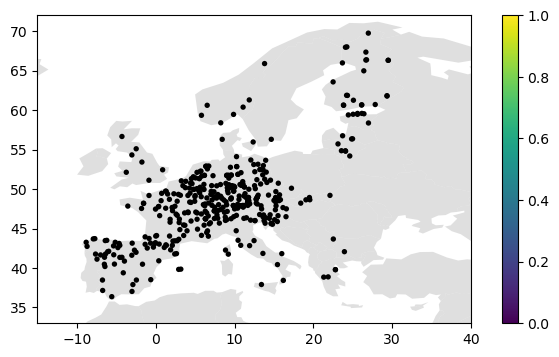

409


In [18]:
import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
df = df_ts_.dropna(subset=['LNC',])
df_group = df.groupby(['Lat', 'Lon', 'sp'])

lat = df_group.count().index.get_level_values('Lat')
lon = df_group.count().index.get_level_values('Lon')
ymin = df_group.min()['year']
ymax = df_group.max()['year']

yrange = np.array(ymax) - np.array(ymin)

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(1, 1, 1)
world.plot(zorder=1, color='silver', ax=ax, alpha=0.5)
cb = ax.scatter(lon, lat, c = 'k', edgecolor='none', s=15,  cmap='Spectral')
ax.set_ylim([33, 72])
ax.set_xlim([-15, 40])
plt.colorbar(cb)

plt.show()
print(len(lat))

### Figure 1 trends

rho=0.535 (p0.010)
rho: 0.084 (p0.000)


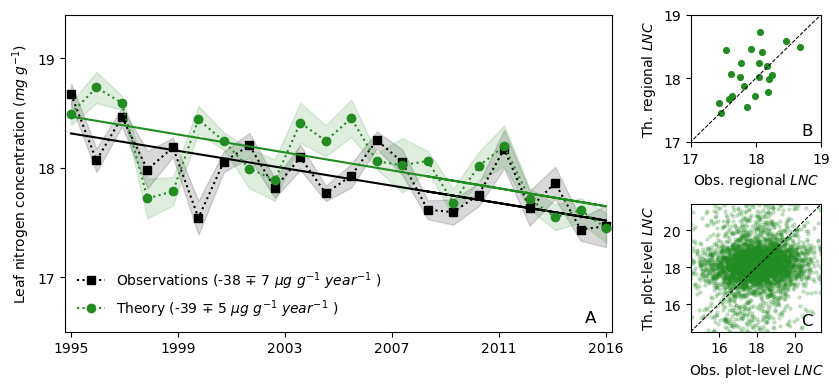

In [19]:
fig_1_trend(['LNC_stdm', 'vcmax25_gs_yi_sunlit_s_stressB_stdm', ], 
            ['Observations', 'Theory' ], df_ts_, figname='../figs/fig_1_trend.pdf',
            colors =['k', 'ForestGreen' ], markers=['s', 'o' ], ylim=[16.5, 19.4])

rho=0.645 (p0.001)
rho: 0.136 (p0.000)


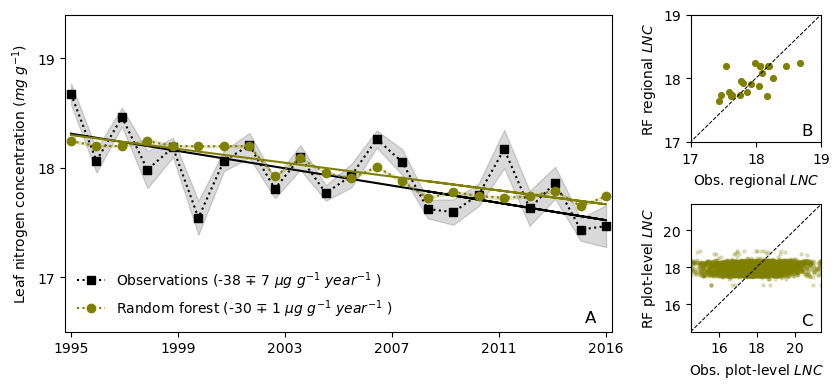

In [20]:
fig_1_trend(['LNC_stdm', 'RF_LNC_m1'], 
            ['Observations', 'Random forest' ], df_ts_, 
            colors =['k', 'Olive'], markers=['s', 'o'], ylim=[16.5, 19.4])

rho=0.266 (p0.232)
rho: -0.033 (p0.034)


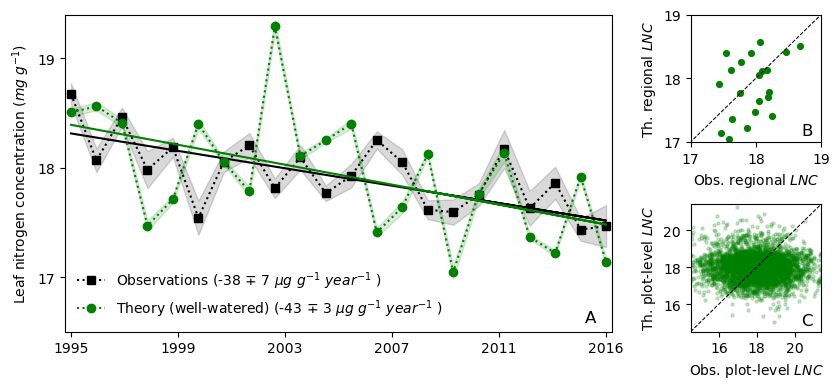

In [21]:
fig_1_trend(['LNC_stdm', 'vcmax25_gs_yi_sunlit_ww_stdm'], 
            ['Observations', 'Theory (well-watered)'], df_ts_, 
            colors =['k', 'Green'], markers=['s', 'o'], ylim=[16.5, 19.4])

### Figure 2 sensitivities

In [22]:
y_vars = ['LNC_stdm', 'RF_LNC_m1', 'vcmax25_gs_yi_sunlit_s_stressB_stdm', 
          'vcmax25_gs_yi_sunlit_ww_stdm', 
          'vcmax25_gs_LTavg_sunlit_s_stressB_stdm', 'vcmax25_gs_yi_sunlit_s_stressB0_stdm',
         ]
y_vars_n = ['Observations', 'Random forest',
            'i) Theory (full)',  'ii) Theory (ww)',
           'iii) Theory (CO$_2$)', 'iv) Theory (climate)']
trend_df = regional_trend_summary(y_vars, y_vars_n, df_ts_)

delta CO2 43.44
delta Year 22

LNC_stdm
kendalltau -0.11408976096878753 p- 3.298552427392913e-27
theilslope-year -37.92190497230141 err 6.776456421655371
theilslope-CO2 -5.247517923427844 err 0.9374595334234403
delta -4.026800682658779 err -1.6624569802733253

RF_LNC_m1
kendalltau -0.6081448048996868 p- 0.0
theilslope-year -30.135464135935308 err 0.69999234401159
theilslope-CO2 -4.188399653676504 err 0.09202656729207725
delta -3.2004389327951284 err -1.5641518404530268

vcmax25_gs_yi_sunlit_s_stressB_stdm
kendalltau -0.16256416975206828 p- 1.7854046868577506e-53
theilslope-year -39.069401448455686 err 4.766933480612558
theilslope-CO2 -5.398942390639795 err 0.653074680269829
delta -4.148649508473347 err -1.8351328387425838

vcmax25_gs_yi_sunlit_ww_stdm
kendalltau -0.286526962821863 p- 3.9979988827187115e-162
theilslope-year -43.382358991029456 err 2.963798605324322
theilslope-CO2 -6.001254938298888 err 0.4068858338738388
delta -4.606628093394114 err -2.156975304134102

vcmax25_gs_LTavg_

Model Variant Trends
Observations -37.92190497230141
Random forest -30.135464135935308
i) Theory (full) -39.069401448455686
ii) Theory (ww) -43.382358991029456
iii) Theory (CO$_2$) -28.83763714570395
iv) Theory (climate) -10.955123901254638

RF Feature importance
0.074 1 $T_a$
0.14400000000000002 2 $VPD$
0.05 0 $PAR$
0.198 3 water
stress
0.528 4 CO$_2$


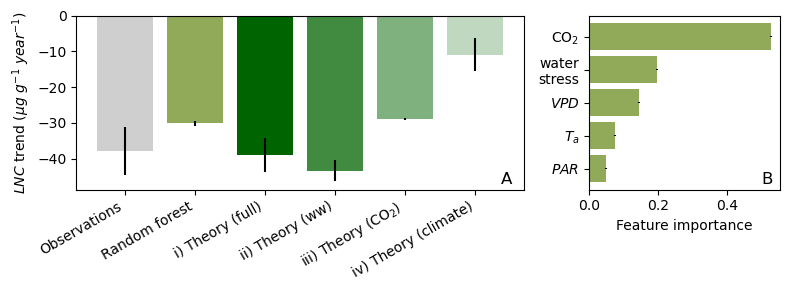

In [23]:
fig_2_trend_variants(trend_df, rf_vi, y_vars_n, figname='../figs/fig_2_trend_variants.pdf',)

In [24]:
np.min(df_ts_['CO2']), np.max(df_ts_['CO2'])

(0.00036097, 0.00040441)

In [25]:
(np.max(df_ts_['CO2'])- np.min(df_ts_['CO2'])) / np.min(df_ts_['CO2'])

0.12034241072665319

In [21]:
from scipy.stats import pearsonr

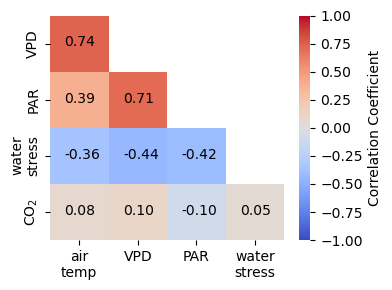

In [97]:
features_list = ['tmp', 'vpd', 'par', 'stressB', 'CO2']
features_labels = ['air\ntemp', 'VPD', 'PAR', 'water\nstress', 'CO$_2$']
n = len(features_list)
corr_matrix = np.eye(n)
pval_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i != j:
            corr, pval = pearsonr(df_ts_[features_list[i]], df_ts_[features_list[j]])
            corr_matrix[i, j] = corr
            pval_matrix[i, j] = pval

for i in range(n):
    for j in range(i, n):
        corr_matrix[i, j] = np.nan

corr_matrix = corr_matrix[1:, :-1]

plt.figure(figsize=(4, 3))
ax = sns.heatmap(
    corr_matrix,
    xticklabels=features_labels[:-1],
    yticklabels=features_labels[1:],
    cmap='coolwarm',
    center=0,
    annot=False,                  
    fmt=".2f",                   
    cbar_kws={'label': 'Correlation Coefficient'},
    vmin=-1, vmax=1,
)

for ri, row in enumerate(np.transpose(corr_matrix)):
    for vi, v in enumerate(row):
        if np.isnan(v)==0:
            ax.text(ri+0.25, vi+0.55, '%-.2f'%v)
plt.tight_layout()
plt.show()
